In [274]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [275]:
# Load the dataset (adjust the file path as necessary)
df = pd.read_csv('cvd_adj.csv')

In [276]:
# Take a smaller sample, e.g., 20% of the data
df_sample = df.sample(frac=0.01, random_state=42)  # Adjust the fraction as needed

In [277]:
# Separate numerical and categorical columns
numerical_columns = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
                     'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

In [278]:
categorical_columns = df_sample.columns.difference(numerical_columns)

In [279]:
# Normalize numerical columns
scaler = StandardScaler()
df_scaled = df_sample.copy()
df_scaled[numerical_columns] = scaler.fit_transform(df_sample[numerical_columns])

In [280]:
# Convert categorical columns to integer (if needed)
df_scaled[categorical_columns] = df_sample[categorical_columns].astype(int)


In [281]:
# Define a range of clusters to evaluate
range_n_clusters = [2, 3, 4, 5, 6]


For n_clusters = 2, the average silhouette_score is : 0.12680817787254925
For n_clusters = 3, the average silhouette_score is : 0.134973389148164
For n_clusters = 4, the average silhouette_score is : 0.12061258169716542
For n_clusters = 5, the average silhouette_score is : 0.11693737875201493
For n_clusters = 6, the average silhouette_score is : 0.11234248746047068


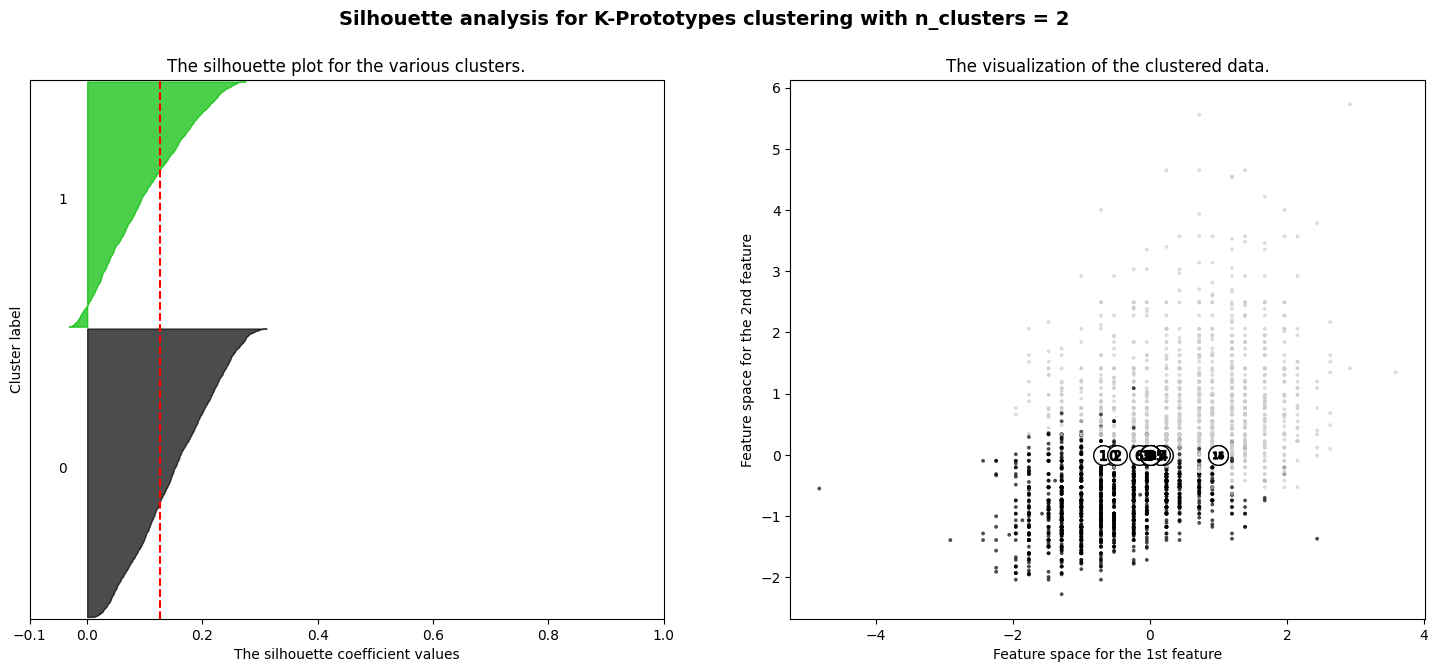

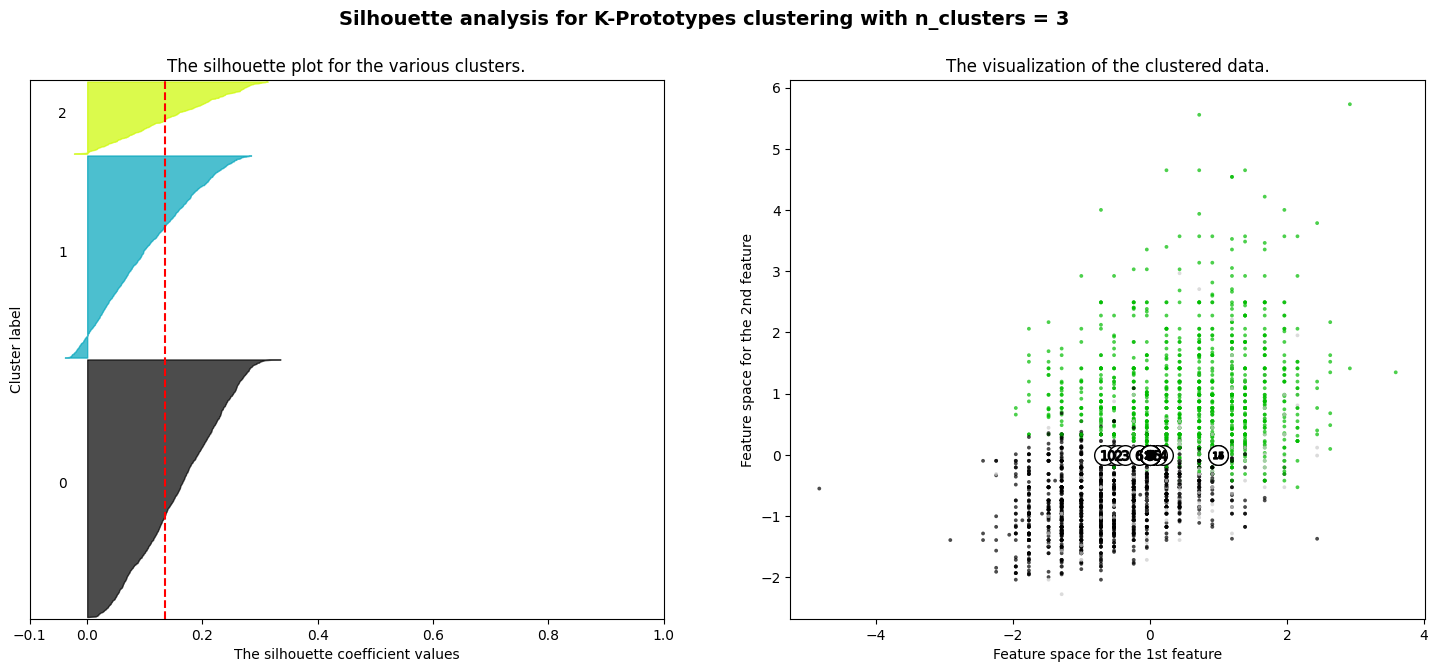

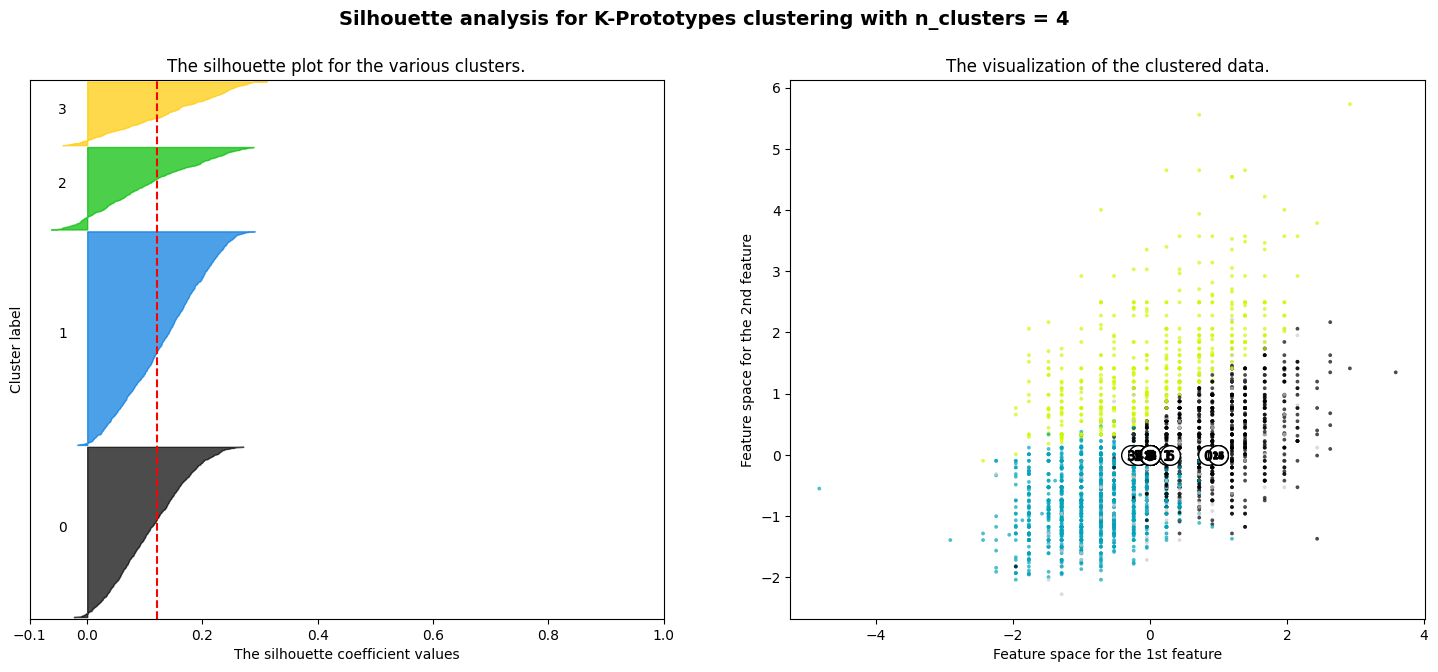

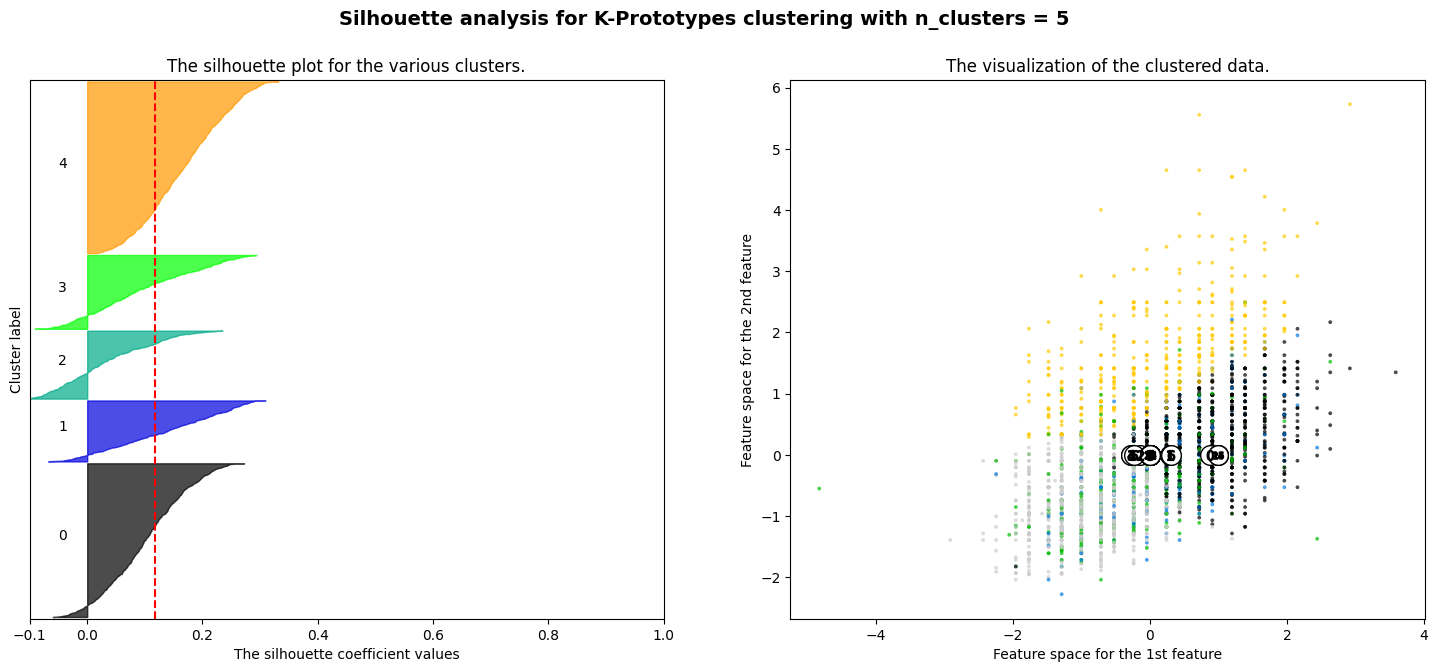

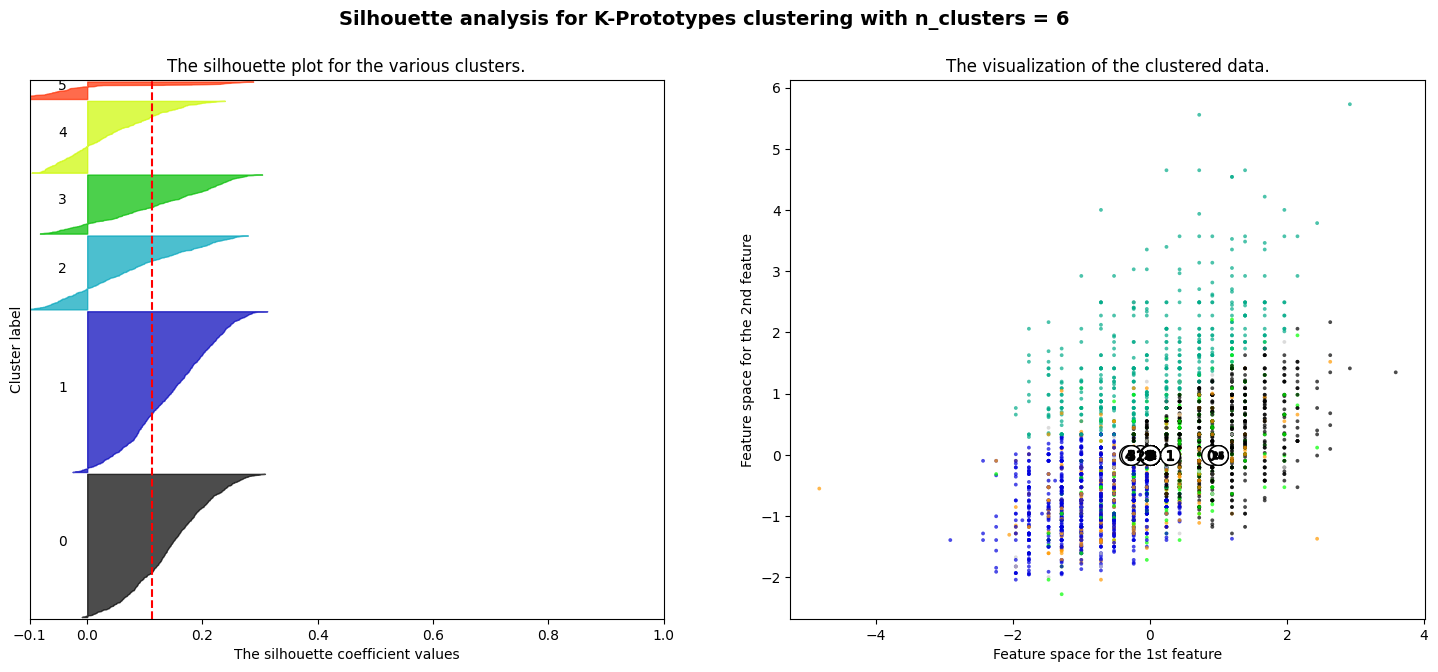

In [284]:
# Loop over different numbers of clusters to visualize silhouette analysis
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns for silhouette and cluster visualization
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_scaled) + (n_clusters + 1) * 10])

    # Apply K-Prototypes clustering
    kproto = KPrototypes(n_clusters=n_clusters, random_state=42)
    cluster_labels = kproto.fit_predict(df_scaled, categorical=list(range(len(numerical_columns), df_scaled.shape[1])))

    # Compute the average silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels, metric='euclidean')
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

    # Compute silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate silhouette scores for each cluster and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label silhouette plots with cluster numbers
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute new y_lower for next plot
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels/ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    ax2.scatter(df_scaled[numerical_columns].values[:, 0], df_scaled[numerical_columns].values[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=cluster_labels.astype(float), cmap='nipy_spectral', edgecolor="k")

    # Correctly extracting only the numerical centroids for visualization
    numerical_centers = kproto.cluster_centroids_[0]  # Numerical centroids

    # Check if the numerical_centers array has more than one feature
    if numerical_centers.ndim == 2:
        # Plot using the first two numerical features
        ax2.scatter(numerical_centers[:, 0], numerical_centers[:, 1], marker="o", c="white", alpha=1, s=200, edgecolor="k")

        for i, c in enumerate(numerical_centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    else:
        # If it's 1D (only one numerical feature), plot accordingly
        ax2.scatter(numerical_centers, np.zeros_like(numerical_centers), marker="o", c="white", alpha=1, s=200, edgecolor="k")

        for i, c in enumerate(numerical_centers):
            ax2.scatter(c, 0, marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(f"Silhouette analysis for K-Prototypes clustering with n_clusters = {n_clusters}", fontsize=14, fontweight='bold')

plt.show()